In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
%matplotlib inline


#import data to a pandas dataframe
data = pd.read_csv(r'C:\Users\nadia\OneDrive\Desktop\solar_data.csv')


#add colums to our dataframe
data['kt'] = data['GHIobs']/ data['TOA']
data['h']= np.radians(90 - data['sza'])
data['m']= (np.sin(data['h']) + 0.15 * (np.degrees(data['h']) + 3.885)**(-1.253))**(-1)
data['kt_1']= data['kt']/(1.031 * np.exp(-1.4/(0.9+ 9.4/data['m'])) + 0.1)


#divide dataframe according to weather conditions
clear = data[data['kt_1'].between(0.65,10)]
intermediate = data[data['kt_1'].between(0.30,0.65)]
cloudy = data[data['kt_1'].between(0.00,0.30)]


print(clear.head(15))


               timestamp      GHIobs   GHIraw      TOA      sza        kt  \
75  2019-01-01T08:13:00Z  280.098494  101.304  485.058  69.8456  0.577454   
76  2019-01-01T08:14:00Z  303.008111  102.042  487.638  69.7337  0.621379   
77  2019-01-01T08:15:00Z  322.162920  102.780  490.200  69.6224  0.657207   
78  2019-01-01T08:16:00Z  331.547972  103.518  492.750  69.5117  0.672852   
79  2019-01-01T08:17:00Z  338.123407  104.250  495.282  69.4016  0.682689   
80  2019-01-01T08:18:00Z  338.929200  104.976  497.802  69.2921  0.680851   
81  2019-01-01T08:19:00Z  332.700232  105.708  500.304  69.1832  0.664996   
82  2019-01-01T08:20:00Z  351.158285  106.434  502.788  69.0750  0.698422   
83  2019-01-01T08:21:00Z  355.980185  107.154  505.260  68.9674  0.704549   
84  2019-01-01T08:22:00Z  358.013673  107.874  507.708  68.8604  0.705157   
85  2019-01-01T08:23:00Z  366.389224  108.594  510.150  68.7540  0.718199   
86  2019-01-01T08:24:00Z  368.059444  109.308  512.568  68.6483  0.718069   

for clear weather conditions
*slope (a) is: [[0.96375769]]
*intercept(b) is [29.29203511]
the MBE for the clear conditions is: -5.703509778014545
the RMSE for the clear conditions is: 48.77728918000243


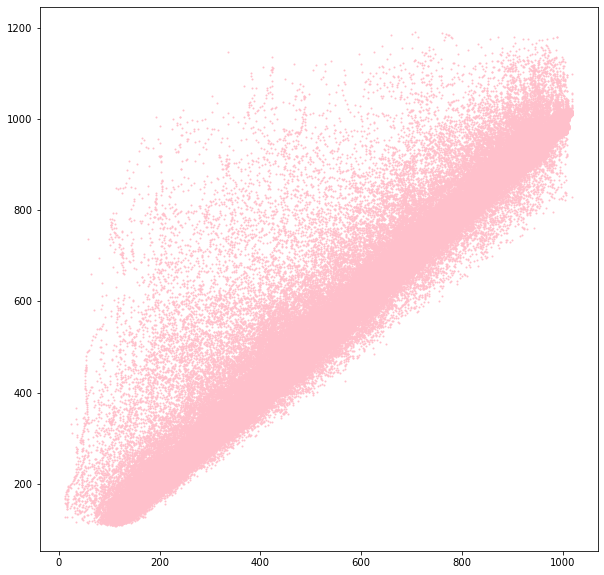

In [2]:
#plotting clear weather conditions and calculating slope and intercept
x1=clear['GHIraw']
y1=clear['GHIobs']
plt.figure(figsize=(10,10))
plt.plot(x1,y1,'ro',color='pink',markersize=1) 

model1 = LinearRegression().fit(x1.values.reshape(-1,1), y1.values.reshape((-1, 1)))

print('for clear weather conditions')
print('*slope (a) is:', model1.coef_)
print("*intercept(b) is",model1.intercept_)


#calculating MBE and RMSE
data['clr']= clear['GHIraw'] - clear['GHIobs'] 
sum_clr = data['clr'].sum()
n = len(data['clr'].index)
MBEclr= sum_clr / n
print("the MBE for the clear conditions is:",MBEclr)
data['clr2'] = (clear['GHIraw'] - clear['GHIobs'])**2
sum_clr2 = data['clr2'].sum()
RMSEclr = (sum_clr2/n)**0.5
print("the RMSE for the clear conditions is:",RMSEclr)

for intermediate weather conditions
*slope (a) is: [[0.57820675]]
*intercept(b) is [79.29942097]
the MBE for the intermediate conditions is: 10.281612395070244
the RMSE for the intermediate conditions is: 56.44738806999835


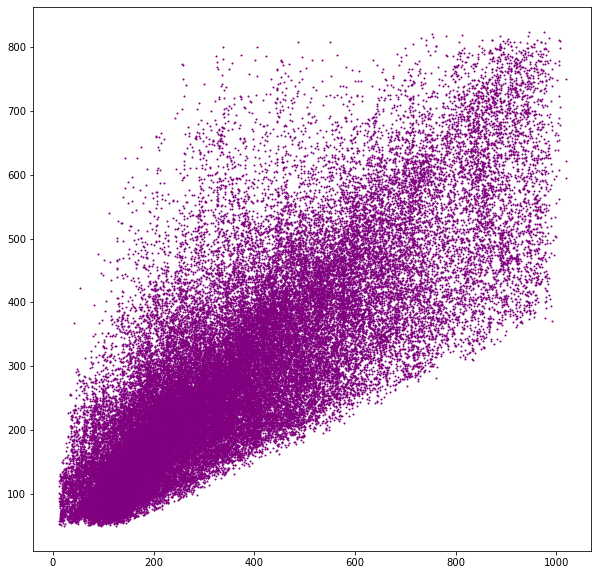

In [3]:
#plotting intermediate weather conditions and calculating slope and intercept
x2=intermediate['GHIraw']
y2=intermediate['GHIobs']
plt.figure(figsize=(10,10))
plt.plot(x2,y2,'ro',color='purple',markersize=1) 
#plt.scatter(x,y, color='pink'),#clear.plot('GHIraw','GHIobs')

model2 = LinearRegression().fit(x2.values.reshape(-1,1), y2.values.reshape((-1, 1)))

print('for intermediate weather conditions')
print('*slope (a) is:', model2.coef_)
print("*intercept(b) is",model2.intercept_)


#calculating MBE and RMSE
data['int']= intermediate['GHIraw'] - intermediate['GHIobs'] 
sum_int = data['int'].sum()
n = len(data['int'].index)
MBEi= sum_int / n
print("the MBE for the intermediate conditions is:",MBEi)
data['int2'] = (intermediate['GHIraw'] - intermediate['GHIobs'])**2
sum_int2 = data['int2'].sum()
RMSEi = (sum_int2/n)**0.5
print("the RMSE for the intermediate conditions is:",RMSEi)

for cloudy weather conditions
*slope (a) is: [[0.2933916]]
*intercept(b) is [50.75793824]
the MBE for the cloudy conditions is: 10.81656825874677
the RMSE for the cloudy conditions is: 55.4942782676963


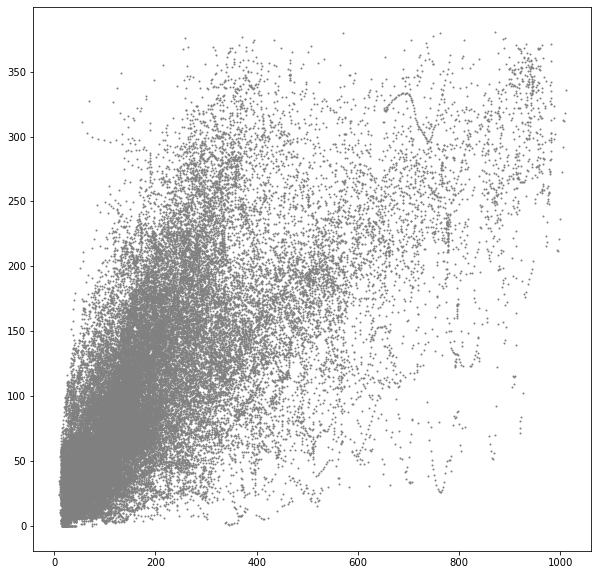

In [4]:
#plotting cloudy weather conditions and calculating slope and intercept
x3=cloudy['GHIraw']
y3=cloudy['GHIobs']

plt.figure(figsize=(10,10))
plt.plot(x3,y3,'ro',color='grey',markersize=1)

model3 = LinearRegression().fit(x3.values.reshape(-1,1), y3.values.reshape((-1, 1)))

print('for cloudy weather conditions')
print('*slope (a) is:', model3.coef_)
print("*intercept(b) is",model3.intercept_)


#calculating MBE and RMSE
data['cld']=  cloudy['GHIraw'] -cloudy['GHIobs'] 
sum_cld = data['cld'].sum()
n = len(data['cld'].index)
MBEcld= sum_cld / n
print("the MBE for the cloudy conditions is:",MBEcld)
data['cld2'] = (cloudy['GHIraw'] - cloudy['GHIobs'])**2
sum_cld2 = data['cld2'].sum()
RMSEcld = (sum_cld2/n)**0.5
print("the RMSE for the cloudy conditions is:",RMSEcld)

In [5]:
print(cloudy[['timestamp','GHIobs','GHIraw','kt','kt_1']].head(50))

                timestamp     GHIobs   GHIraw        kt      kt_1
12   2019-01-01T07:10:00Z  66.280348   77.964  0.226182  0.299136
13   2019-01-01T07:11:00Z  66.219849   83.754  0.223337  0.294524
14   2019-01-01T07:12:00Z  66.571981   90.000  0.221942  0.291856
15   2019-01-01T07:13:00Z  67.743662   96.390  0.223289  0.292811
16   2019-01-01T07:14:00Z  69.344647  102.924  0.226014  0.295575
17   2019-01-01T07:15:00Z  71.353175  109.596  0.230001  0.299982
438  2019-01-02T06:58:00Z  39.191831  152.730  0.156503  0.215259
877  2019-01-03T06:58:00Z   1.241005   22.482  0.004956  0.006816
878  2019-01-03T06:59:00Z   1.278386   22.242  0.005032  0.006896
889  2019-01-03T07:10:00Z   2.055013   17.874  0.007011  0.009273
891  2019-01-03T07:12:00Z   3.136635   19.344  0.010454  0.013746
892  2019-01-03T07:13:00Z   4.004433   20.190  0.013194  0.017301
893  2019-01-03T07:14:00Z   4.964095   21.054  0.016173  0.021148
894  2019-01-03T07:15:00Z   5.608336   21.936  0.018070  0.023566
895  2019-